In [43]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

The aim of this analysis is to divide New York's bnbs into clusters.

In [3]:
bnb = pd.read_csv('AB_NYC_2019.csv')
bnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [4]:
bnb.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [5]:
bnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

To divide the bnbs into cluster the following variables will be used: latitude, longitude, price and number of reviews

In [ ]:
cols = ['price', 'number_of_reviews']

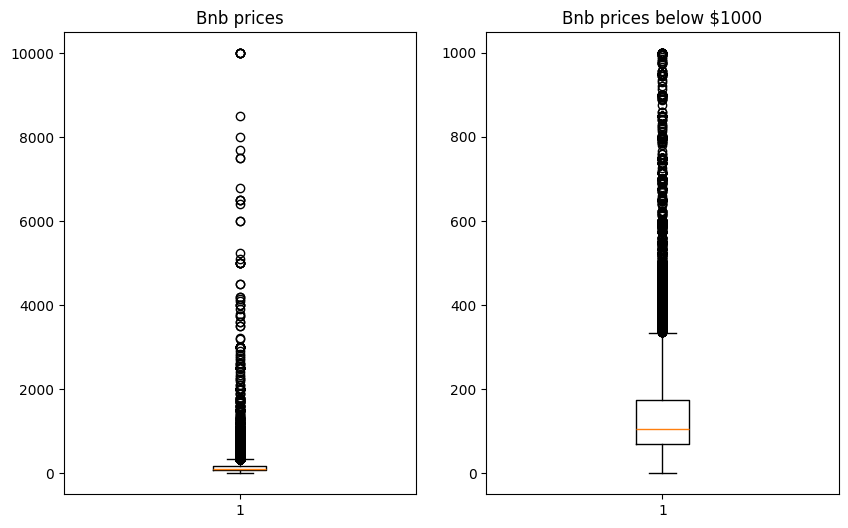

In [25]:
fig, axs = plt.subplots(1,2)
fig.set_figheight(6)
fig.set_figwidth(10)
axs[0].boxplot(bnb['price'])
axs[0].set_title('Bnb prices')
axs[1].boxplot(bnb['price'][bnb['price'] < 1000])
axs[1].set_title('Bnb prices below $1000');

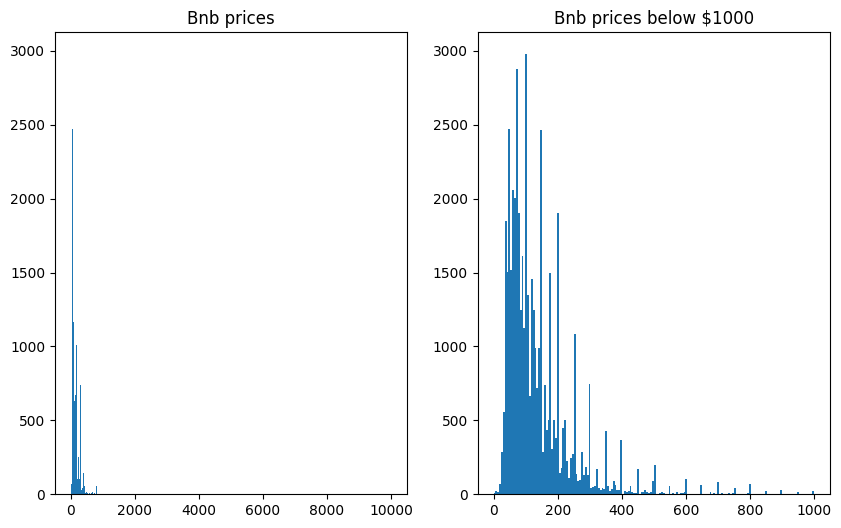

In [27]:
fig, axs = plt.subplots(1,2)
fig.set_figheight(6)
fig.set_figwidth(10)
axs[0].hist(bnb['price'], bins='auto')
axs[0].set_title('Bnb prices')
axs[1].hist(bnb['price'][bnb['price'] < 1000], bins='auto')
axs[1].set_title('Bnb prices below $1000');

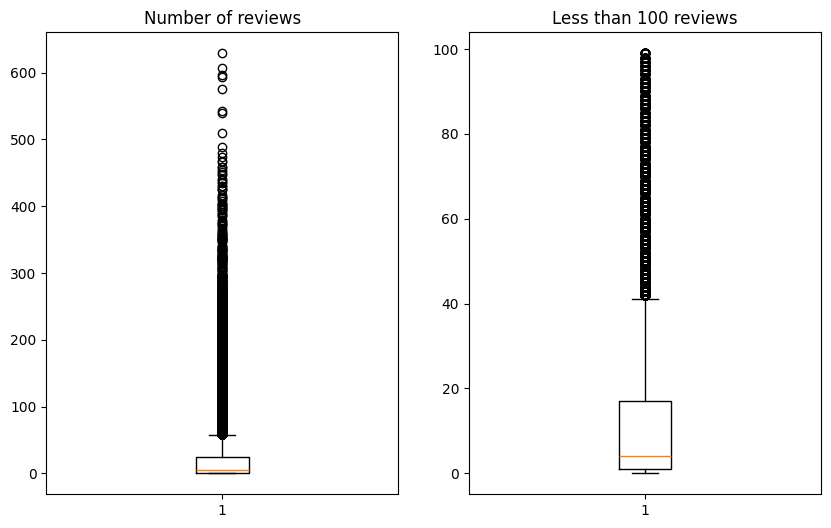

In [30]:
fig, axs = plt.subplots(1,2)
fig.set_figheight(6)
fig.set_figwidth(10)
axs[0].boxplot(bnb['number_of_reviews'])
axs[0].set_title('Number of reviews')
axs[1].boxplot(bnb['number_of_reviews'][bnb['number_of_reviews'] < 100])
axs[1].set_title('Less than 100 reviews');

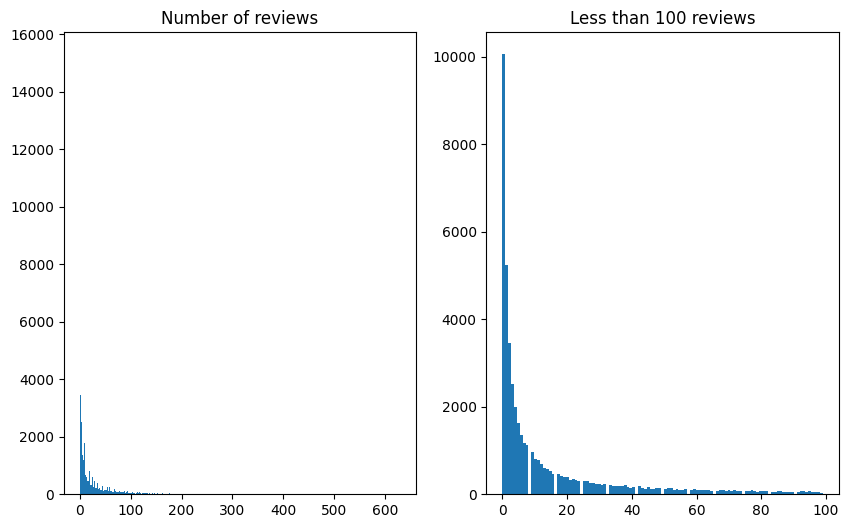

In [31]:
fig, axs = plt.subplots(1,2)
fig.set_figheight(6)
fig.set_figwidth(10)

axs[0].hist(bnb['number_of_reviews'], bins='auto')
axs[0].set_title('Number of reviews')
axs[1].hist(bnb['number_of_reviews'][bnb['number_of_reviews'] < 100], bins='auto')
axs[1].set_title('Less than 100 reviews');

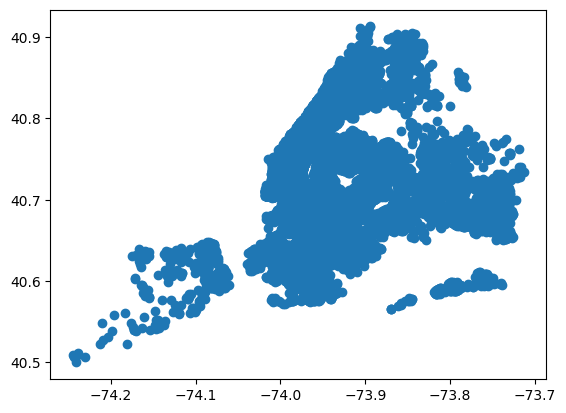

In [33]:
plt.scatter(bnb['longitude'],bnb['latitude']);

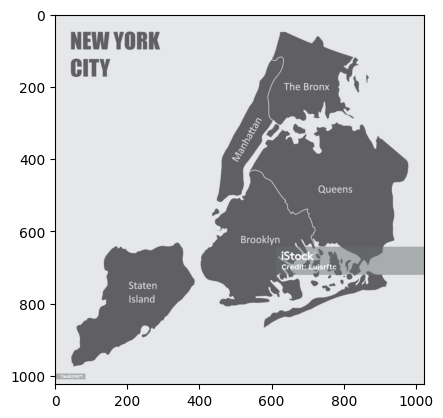

In [35]:
img = plt.imread('New_York.jpg')
fig, ax = plt.subplots()
ax.imshow(img);

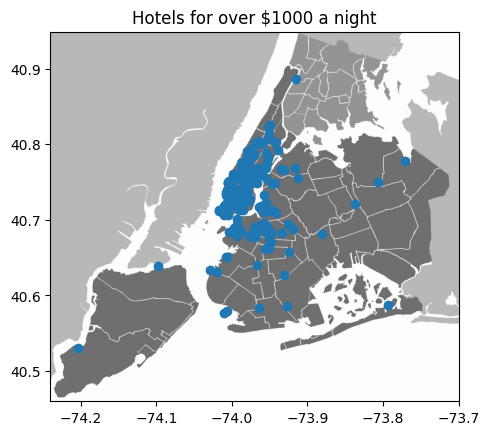

In [36]:
img = plt.imread('New_York_City_.jpg')
fig, ax = plt.subplots()
ax.imshow(img, extent=[-74.24, -73.7, 40.46, 40.949])
plt.scatter(bnb[bnb['price'] > 1000]['longitude'],bnb[bnb['price'] > 1000]['latitude'])
plt.title('Hotels for over $1000 a night');

In [38]:
#number of bnbs per neighbourhood group
bnb_per_neighbourhood = bnb[['neighbourhood_group', 'id']].groupby('neighbourhood_group').count()
bnb_per_neighbourhood

,id
neighbourhood_group,
Bronx,1091
Brooklyn,20104
Manhattan,21661
Queens,5666
Staten Island,373


In [37]:
#mean price per neighbourhood group
bnb_mean_price = bnb[['neighbourhood_group','price']].groupby(['neighbourhood_group']).mean()
bnb_mean_price

,price
neighbourhood_group,
Bronx,87.496792
Brooklyn,124.383207
Manhattan,196.875814
Queens,99.517649
Staten Island,114.812332


In [55]:
# Creating a list of colors for the entire database
colors = {'Bronx': 0,
          'Brooklyn': 1,
          'Manhattan': 2,
          'Queens': 3,
          'Staten Island': 4}

c = [colors[neighbourhood] for neighbourhood in bnb['neighbourhood_group']]

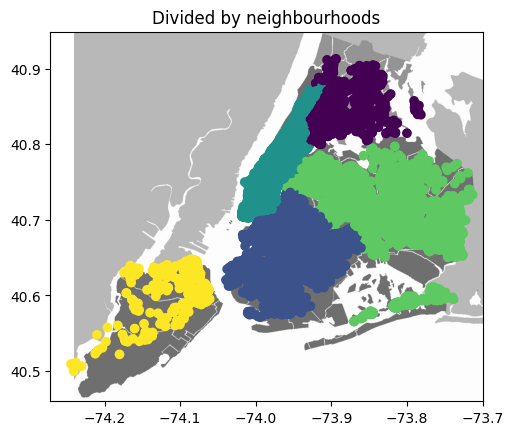

In [41]:
img = plt.imread('New_York_City_.jpg')
fig, ax = plt.subplots()
ax.imshow(img, extent=[-74.24, -73.7, 40.46, 40.949])
plt.scatter(bnb['longitude'],bnb['latitude'], c=c)
plt.title('Divided by neighbourhoods');

Dividing by price and location

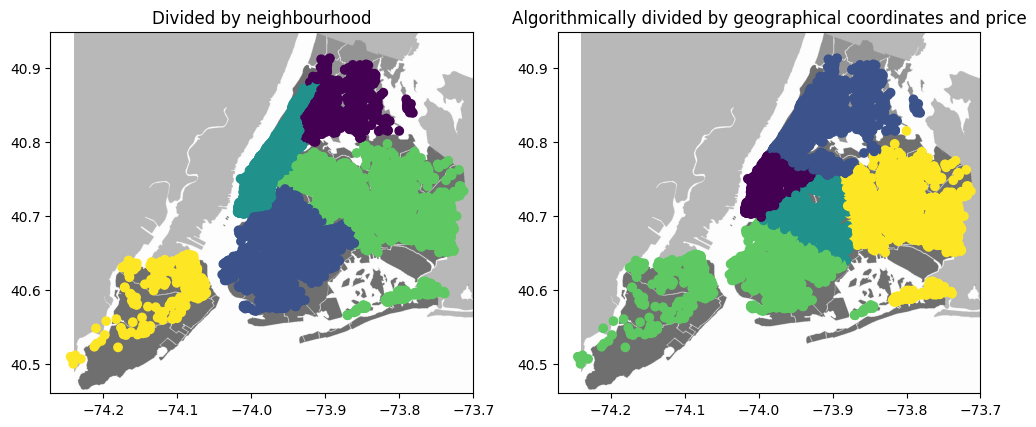

In [44]:
data = MinMaxScaler().fit_transform(bnb[['latitude', 'longitude','price']].to_numpy())
km = KMeans(n_clusters=5, n_init=10).fit(data)
prediction = km.predict(data)

img = plt.imread('New_York_City_.jpg')
fig, ax = plt.subplots(1,2)
ax[0].imshow(img, extent=[-74.24, -73.7, 40.46, 40.949])
ax[0].scatter(bnb['longitude'],bnb['latitude'], c=c)
ax[0].title.set_text('Divided by neighbourhood')
ax[1].imshow(img, extent=[-74.24, -73.7, 40.46, 40.949])
ax[1].scatter(bnb['longitude'],bnb['latitude'], c=prediction)
ax[1].title.set_text('Algorithmically divided by geographical coordinates and price')
fig.set_figheight(12)
fig.set_figwidth(12)

Dividing by price, number of reviews and location

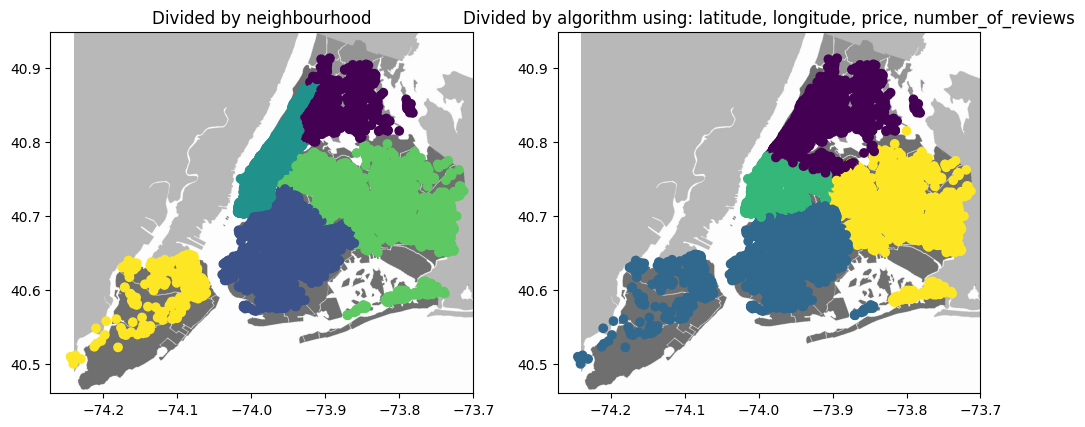

In [59]:
data = MinMaxScaler().fit_transform(bnb[['latitude', 'longitude','price', 'number_of_reviews']].to_numpy())
prediction = KMeans(n_clusters=4, n_init=10).fit_predict(data)

img = plt.imread('New_York_City_.jpg')
fig, ax = plt.subplots(1,2)
ax[0].imshow(img, extent=[-74.24, -73.7, 40.46, 40.949])
ax[0].scatter(bnb['longitude'],bnb['latitude'], c=c)
ax[0].title.set_text('Divided by neighbourhood')
ax[1].imshow(img, extent=[-74.24, -73.7, 40.46, 40.949])
ax[1].scatter(bnb['longitude'],bnb['latitude'], c=prediction)
ax[1].title.set_text('Divided by algorithm using: latitude, longitude, price, number_of_reviews')
fig.set_figheight(12)
fig.set_figwidth(12)

As we can see the algorythm, in both cases, divided our bnbs into clusters similar to the division by neighbourhood groups. Bnbs on Staten Island and Brooklyn seem to be on the same level. Southern Manhattan is in a league of it's own with very high prices and northern Manhattan finds itself in one cluster with Bronx, which had the lowest mean price. Queens is in the middle of all the neighbourhoods and in a separate cluster. There is also one cluster that cannot be seen on the map which probably encompasses all the outliers in different neighbourhoods.